In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix

train = pd.read_csv('C://CAPSTONE//DataSets//Generalised//CSV//Training.csv')
test = pd.read_csv('C://CAPSTONE//DataSets//Generalised//CSV//TestingKNN.csv')
train = train.drop('prognosis',1)
test = test.drop('Disease',1)
train.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,ID
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16


In [2]:
# making training features and labels
train_labels = train['ID']
train_features = train.drop('ID',1)
train_features.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.neighbors import KNeighborsClassifier

#create KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(train_features, train_labels)

KNeighborsClassifier(metric='euclidean')

In [4]:
# making testing features and labels
test_labels = test['ID']
test_features = test.drop('ID',1)
test_features.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#use KNN's predict method to predict values
predictions = knn.predict(test_features)

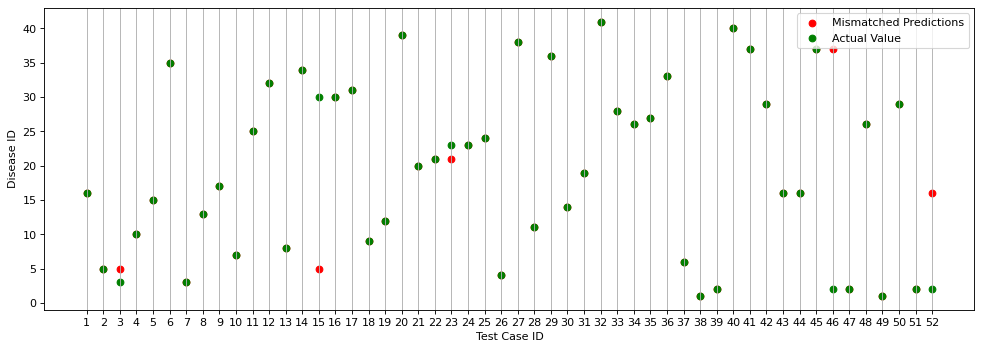

In [14]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

ids = []
for i in range(1,test.shape[0]+1):
    ids.append(i)

#create line chart to show variations
plt.scatter(ids , predictions, label = 'Mismatched Predictions', color = "Red")
plt.scatter(ids , test_labels, label = 'Actual Value', color = "Green")
plt.xlabel('Test Case ID')
plt.ylabel('Disease ID')
plt.xticks(np.arange(1,test.shape[0]+1))
plt.legend()
plt.grid(axis = 'x')
plt.show()

In [8]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.5 degrees.


In [11]:
correct = 0
wrong = 0
for i in range(test.shape[0]):
    if(predictions[i] == test_labels[i]):
        correct = correct+1
    else:
        wrong = wrong+1
print('Accuracy: '+str(round(correct/test.shape[0],3)*100)+'%')

Accuracy: 90.4%
